In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("medical_dataset.csv")

In [3]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,8)

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
numeric_df = df.select_dtypes(include=np.number)

In [9]:
numeric_df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [10]:
fig = px.histogram(
    df,
    x='age',
    marginal='box',
    nbins=47,
    title="Distribution of Age"
)
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(
    df,
    x='bmi',
    marginal='box',
    nbins=47,
    title="Distribution of bmi"
)
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(
    df,
    x='children',
    marginal='box',
    nbins=47,
    title="Distribution of children"
)
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(
    df,
    y='charges',
    marginal='box',
    nbins=47,
    color="smoker",
    title="Distribution of charges"
)
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig = px.histogram(
    df,
    x='charges',
    marginal='box',
    nbins=47,
    color="smoker",
    title="Distribution of charges"
)
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
fig = px.histogram(
    df,
    x='charges',
    marginal='box',
    nbins=47,
    color="gender",
    title="Distribution of charges"
)
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig = px.histogram(
    df,
    x='charges',
    marginal='box',
    nbins=47,
    color="region",
    title="Distribution of charges"
)
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['gender'],
    title='age vs charges'
)

fig.update_traces(marker_size=5)
fig.show()

In [19]:
fig = px.scatter(
    df,
    x='bmi',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['gender'],
    title='age vs charges'
)

fig.update_traces(marker_size=5)
fig.show()

In [20]:
fig = px.scatter(
    df,
    x='children',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['gender'],
    title='age vs charges'
)

fig.update_traces(marker_size=5)
fig.show()

In [21]:
fig = px.violin(
    df,
    x="smoker",
    y="charges",
    box=True,
    points="all"
)

fig.show()

<Axes: xlabel='smoker', ylabel='charges'>

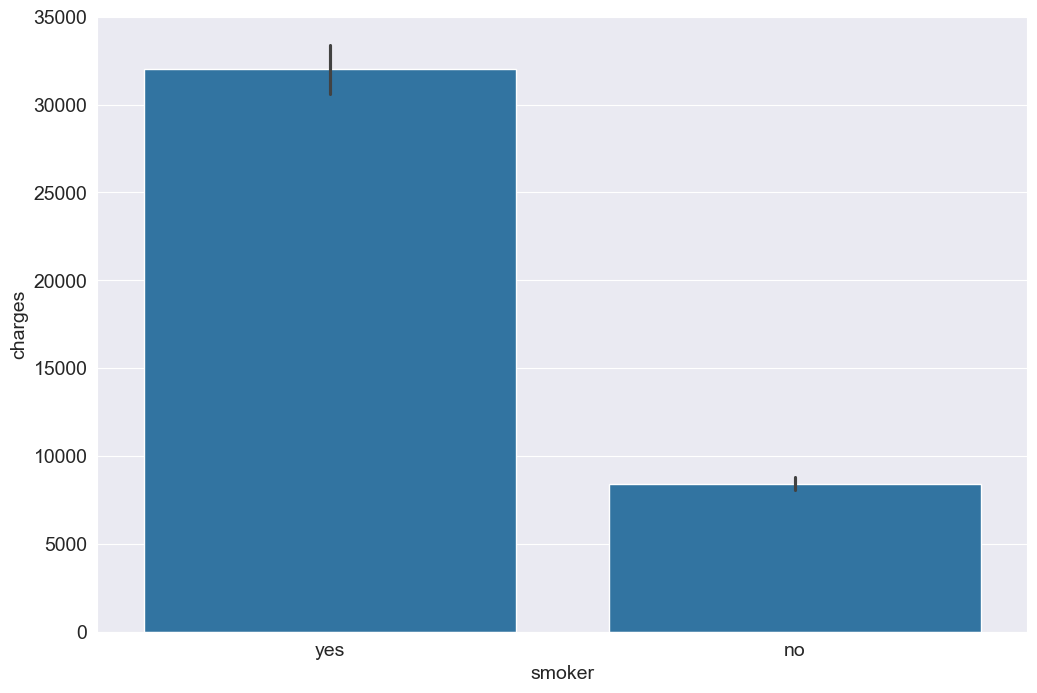

In [22]:
sns.barplot(
    df,
    x="smoker",
    y="charges"
)

In [23]:
smoker_values = {
    "no":0,
    "yes":1
}

smoker_numeric = df.smoker.map(smoker_values)

In [24]:
type(smoker_numeric)

pandas.core.series.Series

In [25]:
original_df = df.copy()
df["smoker"] = smoker_numeric

In [26]:
cols = df.select_dtypes(include=np.number).columns
correlation_df = {}

for column in cols:
    if column == "charges":
        continue
    else:
        correlation_df[column] = df.charges.corr(df[column])

In [27]:
correlation_df

{'age': np.float64(0.2990081933306478),
 'bmi': np.float64(0.19834096883362887),
 'children': np.float64(0.06799822684790487),
 'smoker': np.float64(0.7872514304984778)}

Text(0.5, 1.0, 'Correlation Matrix')

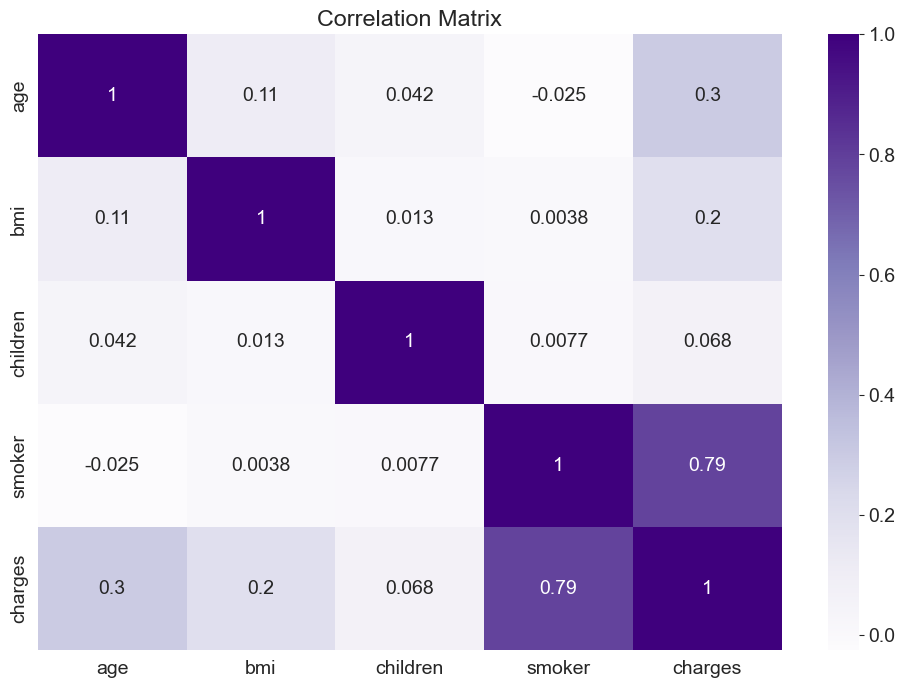

In [28]:
sns.heatmap(df.select_dtypes(np.number).corr(), cmap="Purples", annot=True)
plt.title("Correlation Matrix")

In [29]:
non_smoker_df = df[df.smoker == 0]

In [30]:
non_smoker_df

,age,gender,bmi,children,smoker,region,charges
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,0,southwest,11411.68500
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350


<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

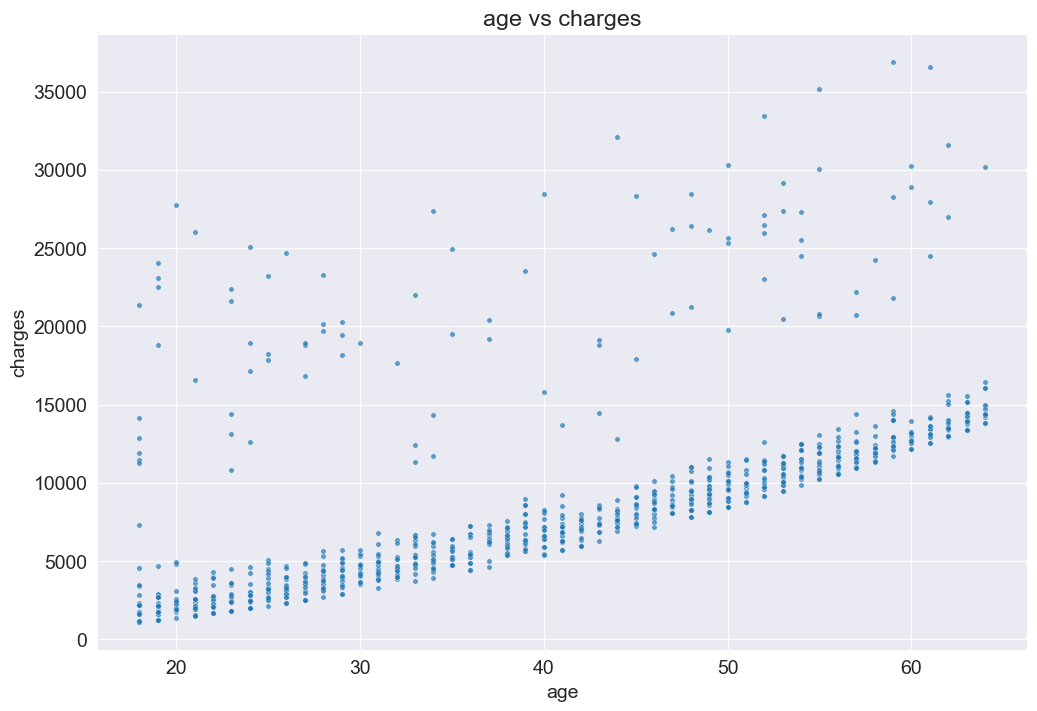

In [31]:
plt.title("age vs charges")
sns.scatterplot(
    non_smoker_df,
    x="age",
    y="charges",
    alpha=0.7,
    s=15
)

In [32]:
def estimate_charges(age, w, b):
    return w*age+b

In [33]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, 200, 1600)

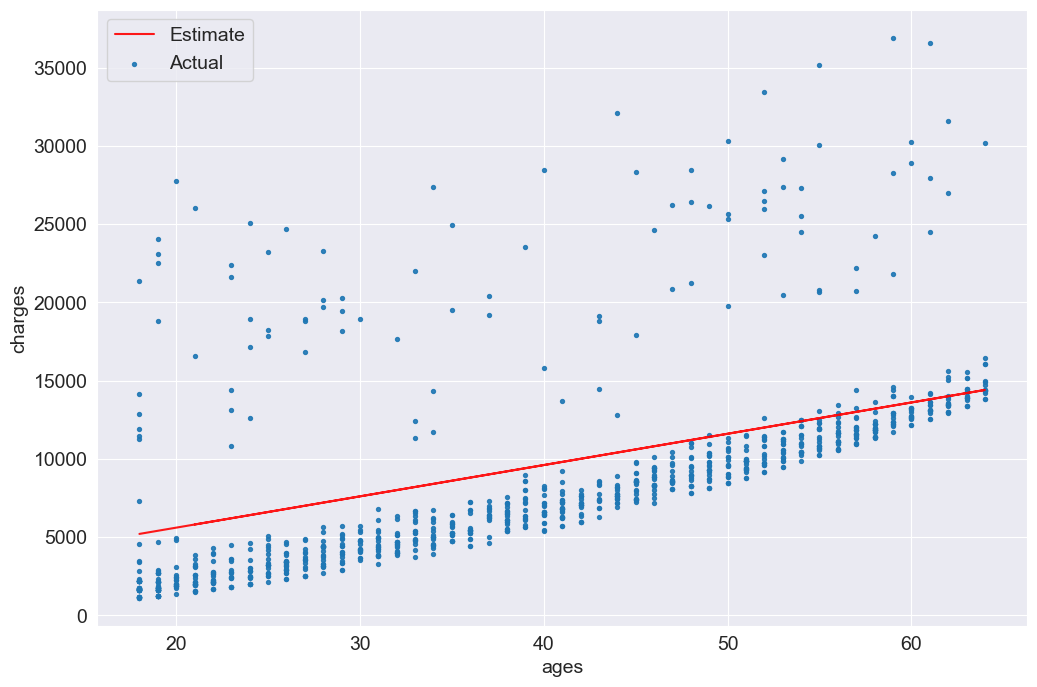

In [34]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.9)
plt.xlabel("ages")
plt.ylabel("charges")
plt.legend(["Estimate", "Actual"])

In [35]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
inputs = non_smoker_df[["age"]]
targets = non_smoker_df[["charges"]]

model.fit(inputs,targets)

LinearRegression()

In [39]:
predictions = model.predict(np.array([[23],
                        [43],
                        [62]]))
predictions

c:\Users\Ansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[ 4055.30443855],
       [ 9400.28269518],
       [14478.01203897]])

In [40]:
predictions = model.predict(inputs)



In [41]:
predictions

array([[2719.0598744 ],
       [5391.54900271],
       [6727.79356686],
       ...,
       [2719.0598744 ],
       [2719.0598744 ],
       [3520.80661289]], shape=(1064, 1))

In [42]:
rmse(predictions=predictions, targets=targets)

np.float64(4662.505766636395)

In [43]:
model.coef_

array([[267.24891283]])

In [44]:
model.intercept_

array([-2091.42055657])

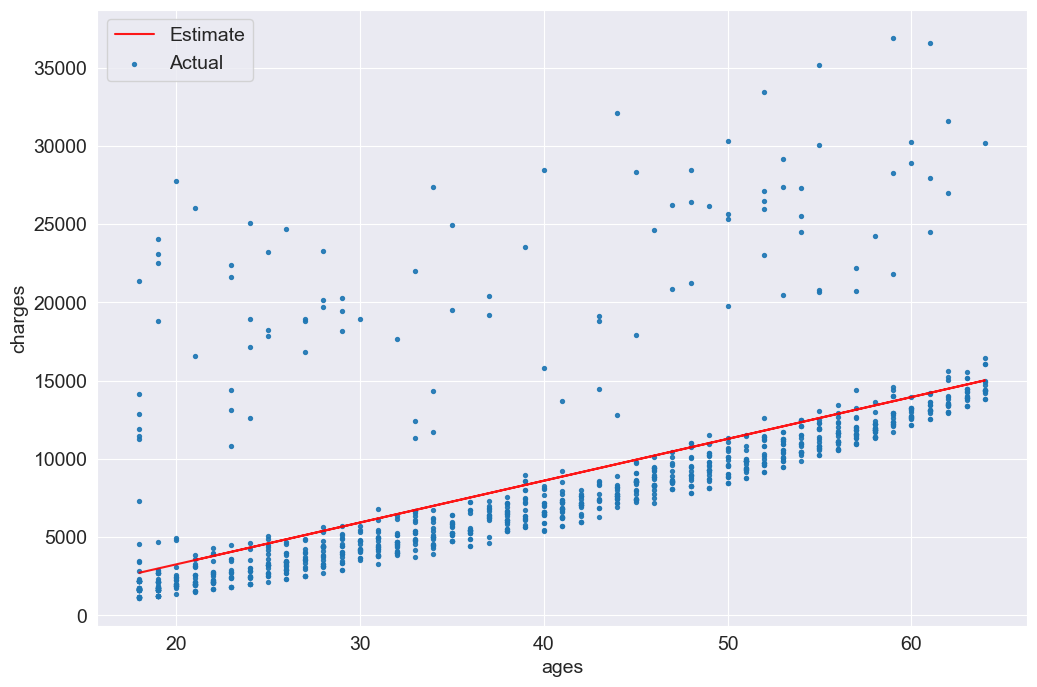

In [45]:
target = non_smoker_df.charges

plt.plot(ages, predictions, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.9)
plt.xlabel("ages")
plt.ylabel("charges")
plt.legend(["Estimate", "Actual"])

In [46]:
from sklearn.linear_model import SGDRegressor

inputs = non_smoker_df[["age"]]
targets = non_smoker_df["charges"]

model = SGDRegressor()
model.fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(7589.977652792398)

In [47]:
inputs, targets = non_smoker_df[["age", "bmi"]], non_smoker_df[["charges"]]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

rmse(predictions=predictions, targets=targets)

np.float64(4662.3128354612945)

In [48]:
inputs, targets = non_smoker_df[["age", "bmi"]], non_smoker_df["charges"]

model = SGDRegressor().fit(inputs, targets)

predictions = model.predict(inputs)

rmse(predictions=predictions, targets=targets)

np.float64(1858581466.3467052)

In [49]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [50]:
inputs, targets = non_smoker_df[["bmi"]], non_smoker_df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(5969.772531913293)

In [51]:
inputs, targets = non_smoker_df[["bmi"]], non_smoker_df["charges"]
model = SGDRegressor().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(7049.193738890037)

In [52]:
inputs, targets = non_smoker_df[["age", "bmi", "children"]], non_smoker_df["charges"]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

rmse(predictions=predictions, targets=targets)

np.float64(4608.470405038246)

In [53]:
smoker_df = df[df['smoker'] == "yes"]

In [54]:
smoker_df

,age,gender,bmi,children,smoker,region,charges


In [55]:
smoker_df.charges.corr(smoker_df.age)

nan

In [56]:
smoker_df.charges.corr(smoker_df.bmi)

nan

In [57]:
smoker_df.charges.corr(smoker_df.children)

nan

In [58]:
fig = px.scatter(
    smoker_df,
    x='bmi',
    y='charges',
    title="bmi vs charges"
)
fig.show()

In [59]:
fig = px.scatter(
    smoker_df,
    x='age',
    y='charges',
    title="bmi vs charges"
)
fig.show()

In [60]:
fig = px.scatter(
    smoker_df,
    x='children',
    y='charges',
    title="bmi vs charges"
)
fig.show()

In [61]:
inputs, targets = smoker_df[["bmi"]], smoker_df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
model.coef_

array([[1473.1062547]])

In [ ]:
model.intercept_

array([-13186.57632276])

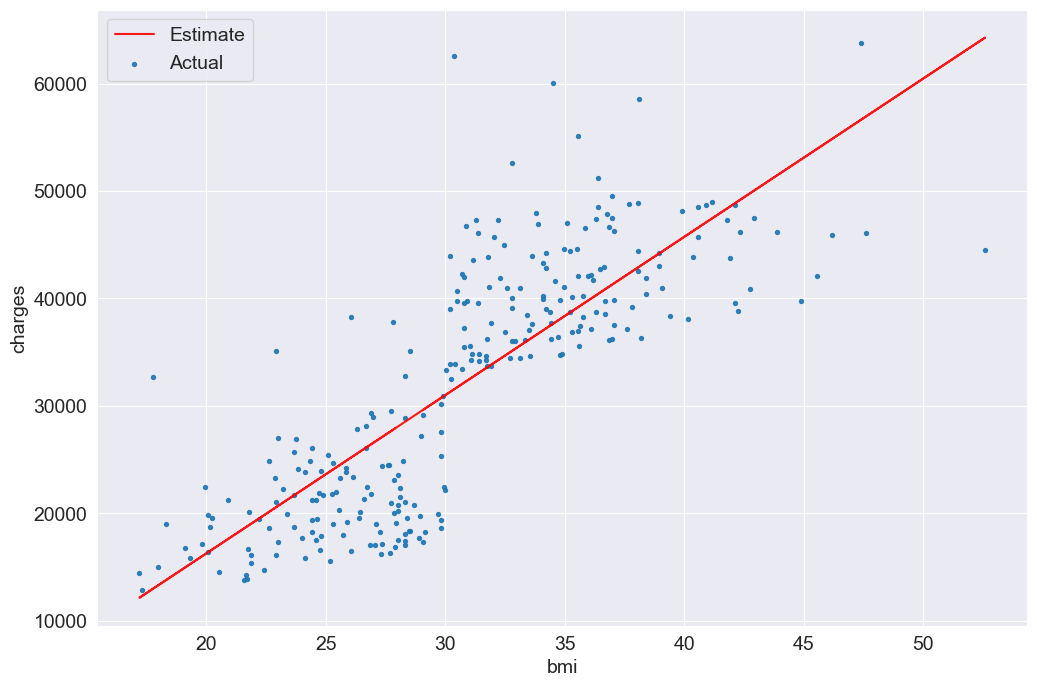

In [ ]:
target = smoker_df.charges
bmi = smoker_df.bmi

plt.plot(bmi, predictions, 'r', alpha=0.9)
plt.scatter(bmi, target, s=8, alpha=0.9)
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend(["Estimate", "Actual"])

In [ ]:
inputs, targets = smoker_df[["bmi", "age"]], smoker_df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(5722.782238884456)

In [ ]:
inputs, targets = smoker_df[["age"]], smoker_df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(10711.00334810241)

In [ ]:
inputs, targets = smoker_df[["children"]], smoker_df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(11513.02182924243)

In [ ]:
inputs, targets = smoker_df[["bmi","age","children"]], smoker_df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(5718.202480524154)

In [ ]:
correlation_df

{'age': np.float64(0.2990081933306478),
 'bmi': np.float64(0.19834096883362887),
 'children': np.float64(0.06799822684790487),
 'smoker': np.float64(0.7872514304984778)}

In [ ]:
smoker_values = {
    "no":0,
    "yes":1
}

smoker_numeric = df.smoker.map(smoker_values)

In [ ]:
df.smoker = smoker_numeric

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [ ]:
fig = px.scatter(
    df,
    x='age',
    y='charges',
    title="age vs charges"
)
fig.show()

In [ ]:
fig = px.scatter(
    df,
    x='bmi',
    y='charges',
    title="bmi vs charges"
)
fig.show()

In [ ]:
fig = px.scatter(
    df,
    x='children',
    y='charges',
    title="children vs charges"
)
fig.show()

In [ ]:
fig = px.scatter(
    df,
    x='smoker',
    y='charges',
    title="smoker vs charges"
)
fig.show()

In [ ]:
inputs, targets = df[["age"]], df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(11551.66562075632)

In [ ]:
inputs, targets = df[["bmi"]], df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(11864.986308399499)

In [ ]:
inputs, targets = df[["children"]], df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(12077.466128266162)

In [ ]:
inputs, targets = df[["smoker"]], df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(7464.630999197846)

In [ ]:
correlation_df

{'age': np.float64(0.2990081933306478),
 'bmi': np.float64(0.19834096883362887),
 'children': np.float64(0.06799822684790487),
 'smoker': np.float64(0.7872514304984778)}

In [ ]:
inputs, targets = df[["age","bmi","smoker","children"]], df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

np.float64(6056.439217188082)

<Axes: xlabel='smoker', ylabel='charges'>

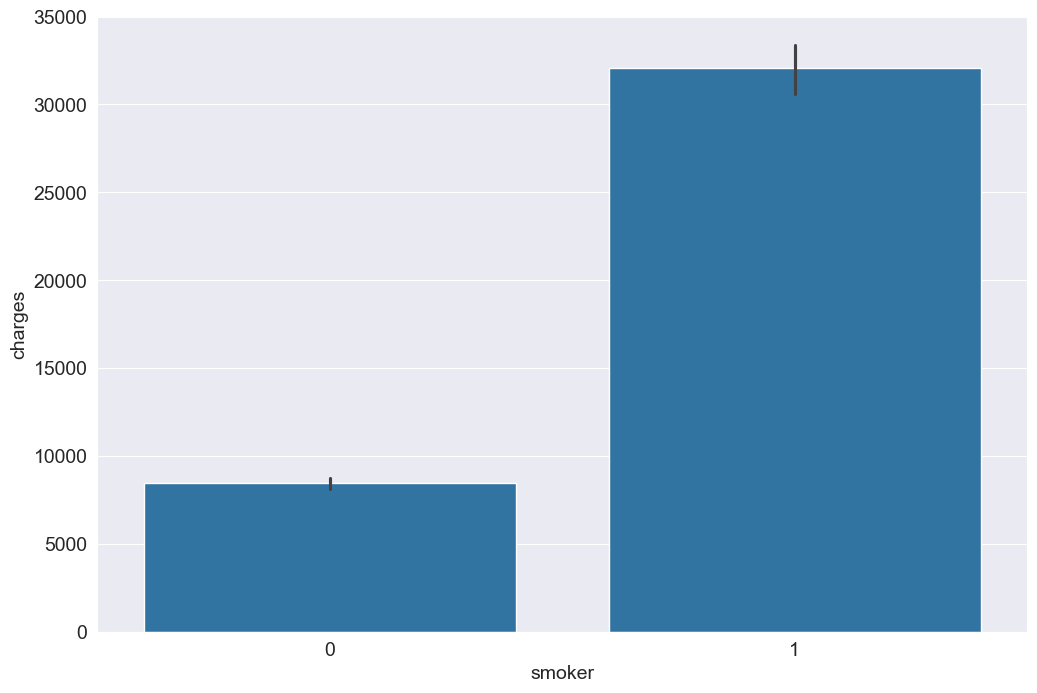

In [ ]:
sns.barplot(df, x='smoker', y='charges')

In [ ]:
df = pd.read_csv("medical_dataset.csv")

In [ ]:
smoker_numbers = {"no":0, "yes":1}
df["numeric_smoker"] = df.smoker.map(smoker_numbers)

In [ ]:
df.charges.corr(df.numeric_smoker)

np.float64(0.7872514304984778)

<Axes: xlabel='region', ylabel='charges'>

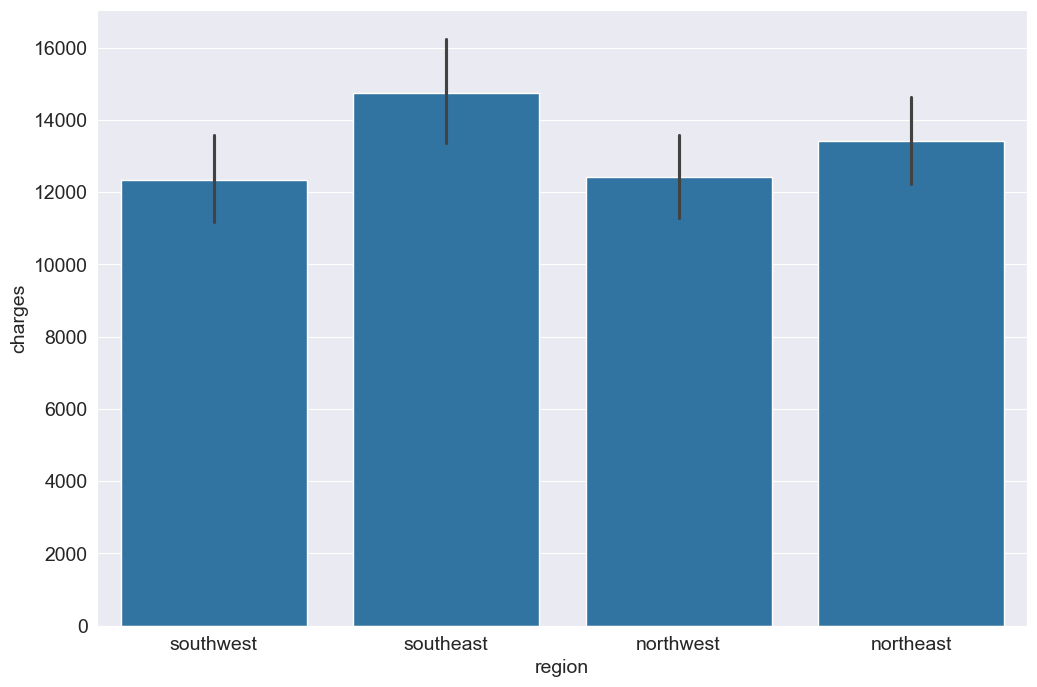

In [ ]:
sns.barplot(df, y='charges',x='region')

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [ ]:
df[['northeast','northwest','southeast','southwest']] = one_hot

In [ ]:
df

,age,gender,bmi,children,smoker,region,charges,numeric_smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [ ]:
df

,age,gender,bmi,children,smoker,region,charges,numeric_smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [ ]:
inputs, targets = df[["age","bmi","smoker","children","northeast","northwest","southeast","southwest"]], df[["charges"]]
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(predictions=predictions, targets=targets)

ValueError: could not convert string to float: 'yes'